# CORRECCIONES A HACER DE LA PRIMERA ENTREGA
- Al tratarse de un dataset con fuerte dependencia cronológica, tiende mucho a la fuga de datos o leakage. Por esta razón la división de los datos en el split debe hacerse teniendo en cuenta el factor tiempo: Por ejemplo, puedes entrenar tu modelo con datos de años anteriores, validar con datos del año siguiente y probar con datos más recientes. Esto ayudará a simular el escenario de predicción en un entorno realista.
Además debemos incluir un conjunto de test.

- Si el dataset aun no está estandarizado los boxplots se tienen que graficar por separado para facilitar su interpretación.

- Con presencia de valores atípicos. ¿Es la media un estadístico adecuado para imputar valores faltantes?

- La matriz de correlación se plotea ANTES de las dummys.

- Añadir explicación del gráfico que informa sobre el balanceo del set de datos.

- Es importante agregar una gráfica de pérdida vs iteraciones del gradiente descendente para observar que el modelo converja.

# Aprendizaje Automatico I - Gravi Fiorino - Gauto

Importamos librerias

In [273]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

3. Realizar un análisis descriptivo, que ayude a la comprensión del problema, de cada
una de las variables involucradas en el problema detallando características,
comportamiento y rango de variación.
Debe incluir:
    * Análisis y decisión sobre datos faltantes.
    * Visualización de datos (por ejemplo histogramas, scatterplots entre variables,
    diagramas de caja)
    * ¿Está balanceado el dataset? ¿Por qué cree que hacemos esta pregunta?
    * Codificación de variables categóricas (si se van a utilizar para predicción).
    * Matriz de correlación de variables.
    * Estandarización de datos.

    * Validación cruzada train - test. Realizar una división del conjunto de datos en
    conjuntos de entrenamiento y prueba (y si se quiere, se puede incluir
    validación, que luego será útil)
    * en el MOMENTO donde usted lo crea adecuado.

Leemos archivo

In [274]:
archivo = pd.read_csv("weatherAUS.csv")
archivo.describe()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,145412.000000,143928.000000,144159.000000,142152.000000,82658.000000,75616.000000,135159.000000,143645.000000,142351.000000,142759.000000,140907.000000,130351.000000,130388.000000,89542.000000,86076.000000,143646.000000,141805.000000,142153.000000
mean,72728.184393,12.195873,23.223176,2.361516,5.468616,7.611241,40.036564,14.044742,18.663164,68.877290,51.537432,1017.649277,1015.255184,4.447287,4.509770,16.992780,21.685249,2.361242
std,41990.722236,6.398018,7.118770,8.479338,4.193871,3.785612,13.607212,8.915610,8.810276,19.029576,20.796720,7.107132,7.037981,2.887161,2.720306,6.488045,6.936358,8.479084
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,36362.750000,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,72727.500000,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,109093.250000,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,145458.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [275]:
archivo.dtypes

Unnamed: 0            int64
Date                 object
Location             object
MinTemp             float64
MaxTemp             float64
Rainfall            float64
Evaporation         float64
Sunshine            float64
WindGustDir          object
WindGustSpeed       float64
WindDir9am           object
WindDir3pm           object
WindSpeed9am        float64
WindSpeed3pm        float64
Humidity9am         float64
Humidity3pm         float64
Pressure9am         float64
Pressure3pm         float64
Cloud9am            float64
Cloud3pm            float64
Temp9am             float64
Temp3pm             float64
RainToday            object
RainTomorrow         object
RainfallTomorrow    float64
dtype: object

# Análisis Exploratorio

In [276]:
archivo.head(3)

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0


Dropeamos columna "Unnamed: 0"

In [277]:
archivo = archivo.drop("Unnamed: 0", axis = "columns")

### Eliminacion de ciudades

Nos quedamos con las ciudades de interes:  
* Adelaide,  
* Canberra, 
* Cobar, 
* Dartmoor, 
* Melbourne,
* MelbourneAirport, 
* MountGambier, 
* Sydney, 
* SydneyAirport.

In [278]:
ciudadesDeInteres = ["Adelaide","Canberra","Cobar", "Dartmoor","Melbourne","MelbourneAirport", "MountGambier", "Sydney", "SydneyAirpor"]

In [279]:
df = archivo[archivo['Location'].isin(ciudadesDeInteres)]
#df.head()

In [280]:
df["Location"].unique()

array(['Cobar', 'Sydney', 'Canberra', 'MelbourneAirport', 'Melbourne',
       'Dartmoor', 'Adelaide', 'MountGambier'], dtype=object)

Nos parecio imperativo conocer la estación del año en la que nos encontramos. Por lo tanto, construimos una funcion para ello

In [281]:
df['Date'] = pd.to_datetime(df['Date'])

def get_season(month):
    if month in [12, 1, 2]:  # Diciembre, Enero, Febrero -> Verano
        return 'Verano'
    elif month in [3, 4, 5]:  # Marzo, Abril, Mayo -> Otoño
        return 'Otoño'
    elif month in [6, 7, 8]:  # Junio, Julio, Agosto -> Invierno
        return 'Invierno'
    else:  # Septiembre, Octubre, Noviembre -> Primavera
        return 'Primavera'
df['Season'] = df['Date'].dt.month.map(get_season)

C:\Users\Lucas\AppData\Local\Temp\ipykernel_11936\426852557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\Lucas\AppData\Local\Temp\ipykernel_11936\426852557.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Season'] = df['Date'].dt.month.map(get_season)


## Matriz de correlación

In [282]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow', 'Season'],
      dtype='object')

In [283]:
df.RainTomorrow

6047       No
6048       No
6049       No
6050       No
6051       No
         ... 
102515    Yes
102516     No
102517     No
102518    Yes
102519     No
Name: RainTomorrow, Length: 25225, dtype: object

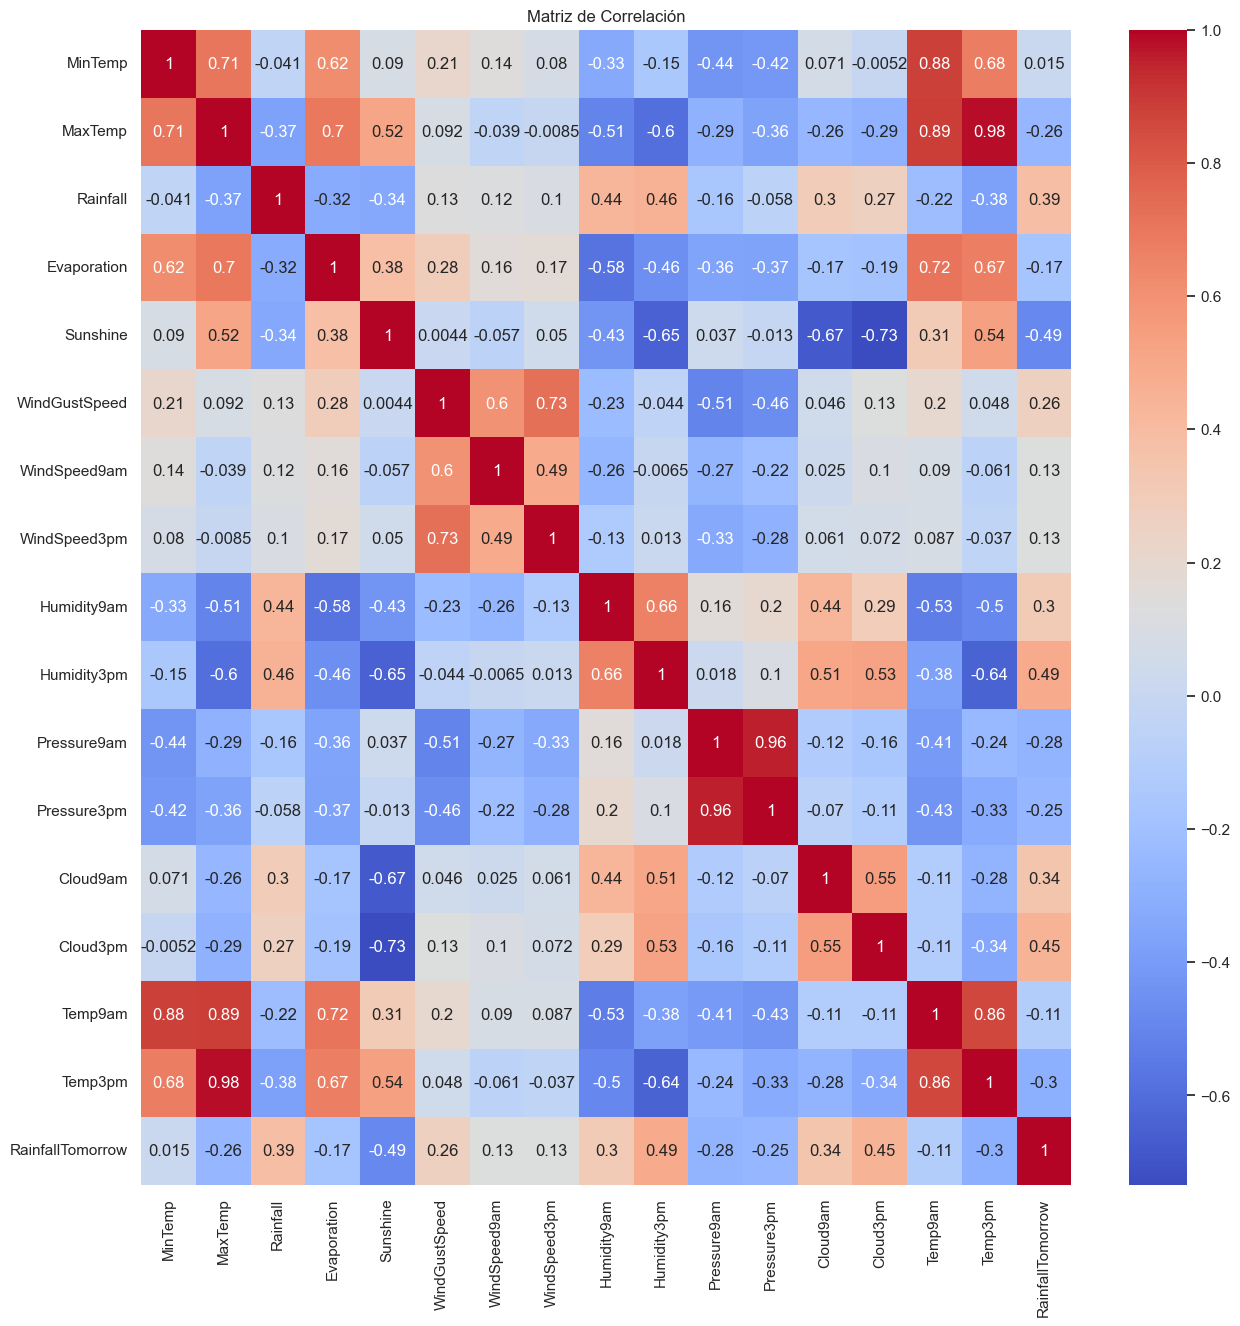

In [284]:
corr_matrix = df.drop(['Date','Location','WindGustDir', 'WindDir9am','WindDir3pm','Season','RainToday','RainTomorrow'], axis=1).corr(method='spearman')
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Son varias las correlaciones que podemos encontrar en este dataset, por ello decidimos comentar solamente aquellas que tuvieran una correlación mayor a 0.7 o menor a -0.7 y un caso más para las que variables que posean una correlación inversa (ya que son pocas). Entre ellas se encuentran:
- Temp3pm vs Temp9am
- MaxTemp vs Temp3pm
- MinTemp vs Temp9am
- MaxTemp vs Temp9am
- Cloud3pm vs Sunshine
- Humidity3pm vs Temp3pm
- Pressure3pm vs Pressure9am
- WindSpeed3pm vs WindGustSpeed
- MaxTemp vs MinTemp

### Correlación entre estas variables

In [285]:
sns.set_theme()

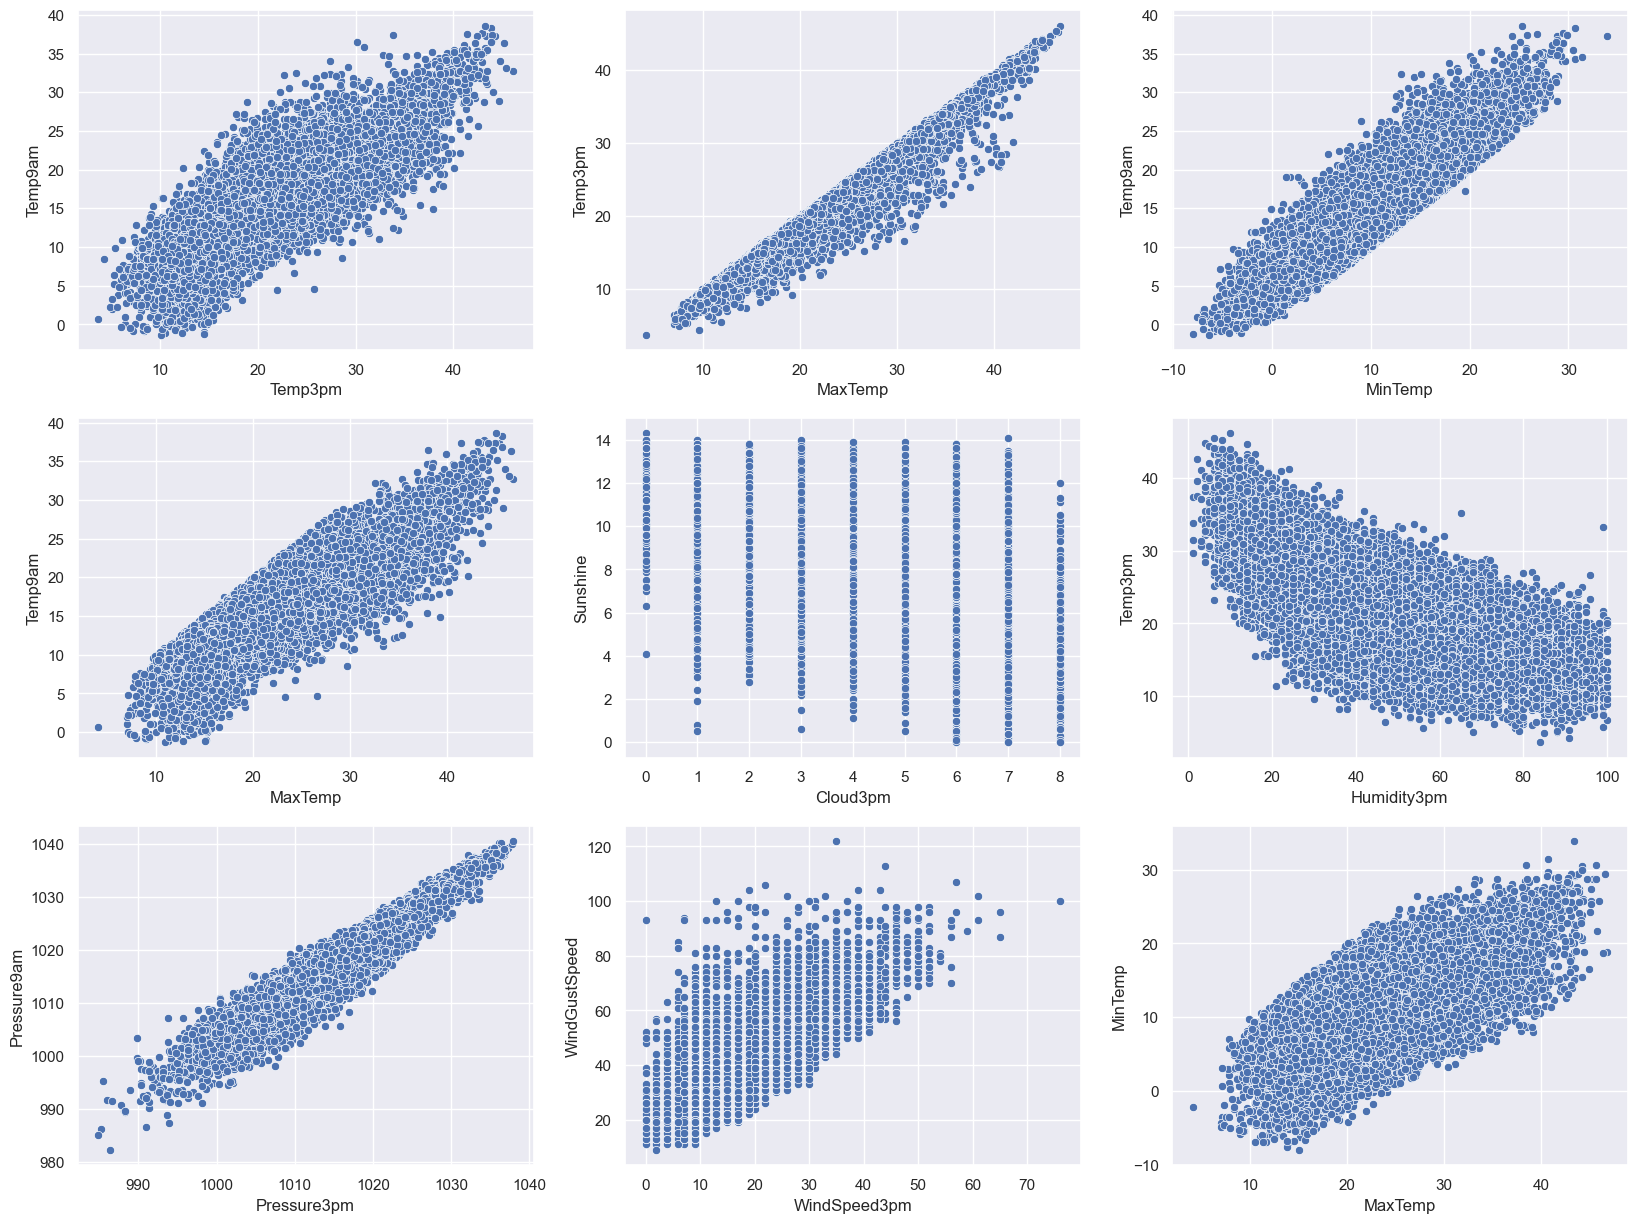

In [286]:
fig, ax = plt.subplots(3,3, figsize = (20,15))

sns.scatterplot(data = df, x='Temp3pm', y='Temp9am', ax=ax[0,0])
sns.scatterplot(data=df,x='MaxTemp', y='Temp3pm', ax=ax[0,1])
sns.scatterplot(data=df, x='MinTemp',y='Temp9am', ax=ax[0,2])
sns.scatterplot(data=df, x='MaxTemp',y='Temp9am', ax=ax[1,0])
sns.scatterplot(data=df, x='Cloud3pm', y='Sunshine', ax=ax[1,1])
sns.scatterplot(data=df, x='Humidity3pm', y='Temp3pm', ax=ax[1,2])
sns.scatterplot(data=df, x='Pressure3pm', y='Pressure9am', ax=ax[2,0])
sns.scatterplot(data=df, x='WindSpeed3pm', y='WindGustSpeed', ax=ax[2,1])
sns.scatterplot(data=df, x='MaxTemp', y='MinTemp',ax=ax[2,2])

plt.show()

## Análisis de outliers

In [287]:
df_numerico = df.drop(['Date','Location','WindGustDir', 'WindDir9am','WindDir3pm','Season','RainToday','RainTomorrow'], axis=1)

Text(0.5, 1.0, 'Distribución de variables numéricas')

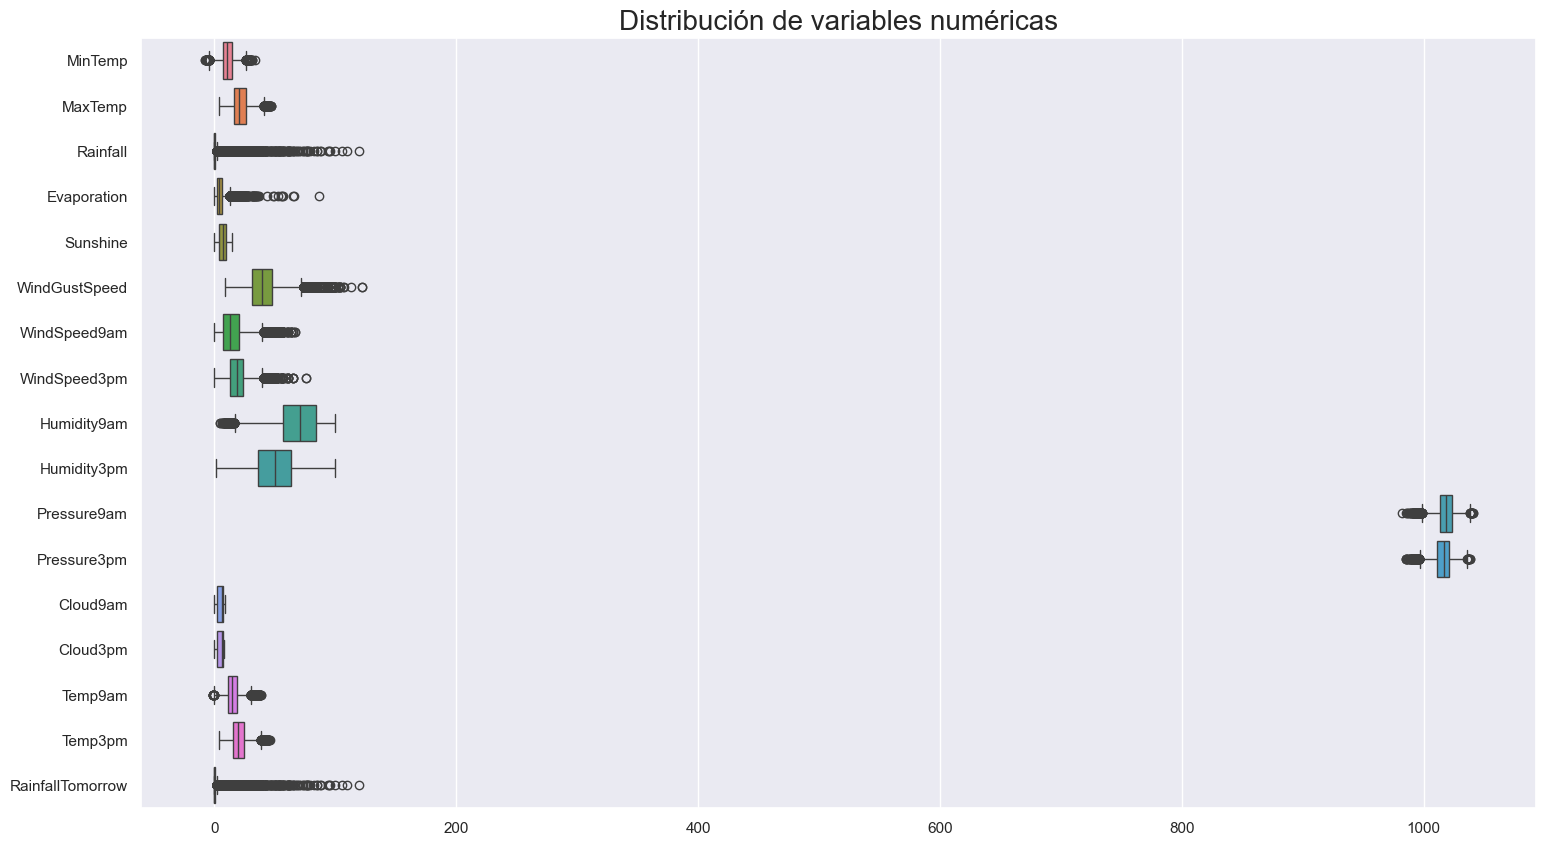

In [288]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=df_numerico, orient='h')
plt.title("Distribución de variables numéricas", fontsize = 20)

Si bien es necesario realizar une escalado antes de realizar este tipo de gráfico, a simple vista podemos ver que en nuestro dataset hay varios valores atípicos. Esta es información valiosa ya que nos permite evaluar el método de escalado apropiado.

En datasets con muchos valores atípicos es más conveniente utilizar un escalado robusto, el cual es menos sensible a outliers.

### Escalado del conjunto de datos numérico para Análisis Exploratorio
Este escalado se realizará sólo con el fin de mejorar el análisis exploratorio.

Posteriormente, cunado se requiera, se realizará el escalado correspondiente para los conjuntos de entrenamiento, validación y testeo.

In [289]:
from sklearn.preprocessing import RobustScaler

In [290]:
df_numerico

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
6047,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0.0
6048,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0.0
6049,15.5,34.1,0.0,12.6,13.3,30.0,NaN,7.0,NaN,7.0,NaN,1011.6,NaN,1.0,NaN,32.7,0.0
6050,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0.0
6051,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102515,6.2,16.3,0.0,NaN,NaN,41.0,24.0,22.0,89.0,70.0,1026.3,1024.1,NaN,NaN,8.7,15.5,2.0
102516,8.7,13.2,2.0,NaN,NaN,20.0,0.0,11.0,98.0,82.0,1029.2,1028.3,NaN,8.0,11.1,12.0,0.0
102517,7.0,15.7,0.0,NaN,NaN,31.0,13.0,15.0,92.0,67.0,1027.0,1022.4,8.0,NaN,10.0,14.9,0.0
102518,5.4,16.2,0.0,NaN,NaN,37.0,24.0,24.0,90.0,70.0,1017.0,1014.4,8.0,4.0,6.4,14.9,2.2


In [291]:
scaler = RobustScaler()
numerico_escalado = scaler.fit_transform(df_numerico)

In [292]:
df_numerico_escalado = pd.DataFrame(numerico_escalado)
df_numerico_escalado.columns = df_numerico.columns
df_numerico_escalado.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
0,0.973684,1.464646,0.0,1.904762,0.793651,0.529412,-0.538462,0.090909,-1.888889,-1.370370,-1.21,-1.202020,-0.8,-0.2,1.592105,1.494737,0.0
1,1.039474,0.828283,0.0,2.571429,0.904762,-0.117647,0.461538,0.000000,-1.518519,-1.555556,-0.55,-0.424242,-1.0,-1.0,0.763158,0.821053,0.0
2,0.657895,1.353535,0.0,2.047619,0.952381,-0.529412,NaN,-1.090909,NaN,-1.592593,NaN,-0.474747,NaN,-1.0,NaN,1.421053,0.0
3,1.171053,1.707071,0.0,1.619048,0.523810,0.411765,1.307692,-0.363636,-1.074074,-1.037037,-0.61,-0.717172,-1.0,0.0,1.868421,1.652632,0.0
4,1.500000,1.787879,0.0,1.761905,0.777778,-0.470588,-0.538462,-1.181818,-1.259259,-1.037037,-0.57,-0.727273,-1.0,-0.2,1.921053,1.726316,0.0
5,1.802632,2.050505,0.0,1.714286,0.174603,-0.235294,0.307692,-0.545455,-1.925926,-1.296296,-0.77,-0.898990,-1.0,0.0,2.513158,1.936842,0.0
6,2.184211,1.555556,0.0,2.142857,-1.158730,0.235294,-0.461538,0.090909,-1.666667,-1.148148,-1.07,-0.898990,0.4,0.4,2.131579,1.589474,0.0
7,1.684211,1.343434,0.0,1.380952,0.841270,0.117647,0.307692,0.000000,-1.407407,-1.296296,-0.71,-0.646465,-0.6,-1.0,1.381579,1.294737,0.0
8,0.736842,1.363636,0.0,2.523810,0.936508,-0.117647,0.153846,-1.181818,-1.703704,-1.518519,-0.51,-0.717172,-1.0,-1.0,0.815789,1.431579,0.0
9,1.118421,1.494949,0.0,1.904762,0.793651,0.529412,1.307692,-0.909091,-0.925926,-0.814815,-1.01,-1.242424,-1.0,-0.2,1.171053,1.484211,0.0


# Graficos

Distribucion, entender la tendencia central, dispersion y forma de cada variable.

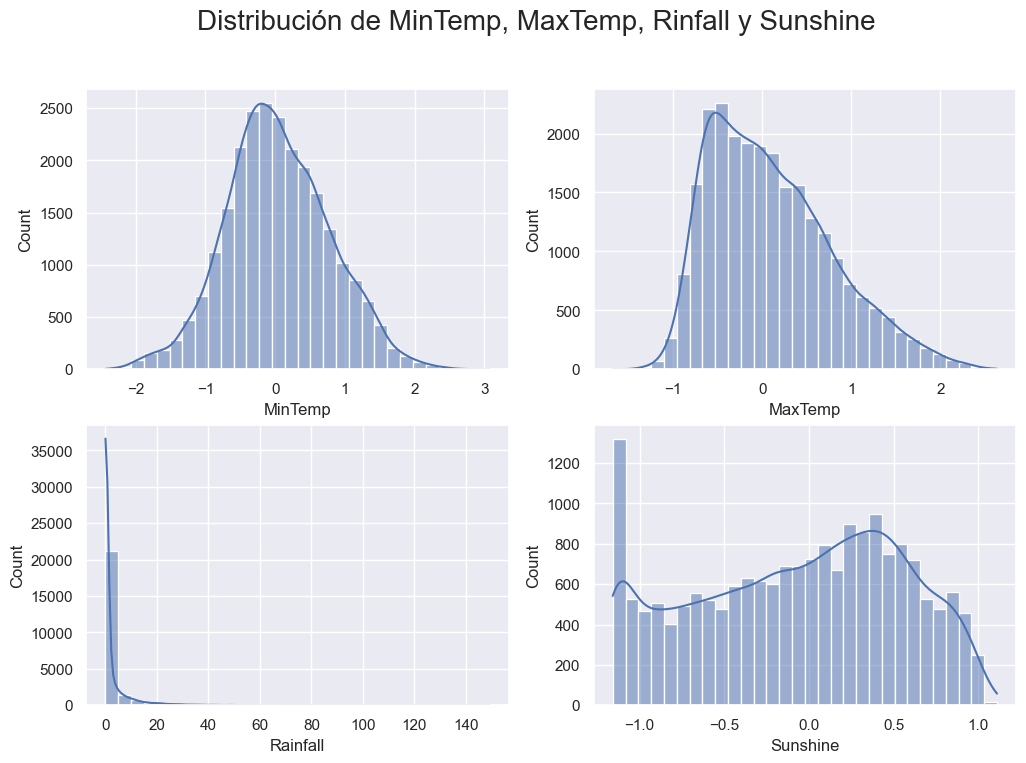

In [293]:
#fig, ax = plt.subplots(2,2,figsize = (12,6), sharex=True, sharey=True)
fig, ax = plt.subplots(2,2,figsize = (12,8))

#plt.figure(figsize=(12, 8))
sns.histplot(data=df_numerico_escalado['MinTemp'], bins=30, kde=True, ax = ax[0,0])
#ax[0,0].set_title('MinTemp')

sns.histplot(data=df_numerico_escalado['MaxTemp'], bins=30, kde=True, ax = ax[0,1])
#ax[0,1].set_title('MaxTemp')

sns.histplot(data=df_numerico_escalado['Rainfall'], bins=30, kde=True, ax = ax[1,0])
#ax[1,0].set_title('Rainfall')

sns.histplot(data=df_numerico_escalado['Sunshine'], bins=30, kde=True, ax = ax[1,1])
#ax[1,1].set_title('Sunshine')

plt.suptitle("Distribución de MinTemp, MaxTemp, Rinfall y Sunshine", fontsize = 20)

#plt.xlabel('Valor')
#plt.ylabel('Frecuencia')
plt.show()

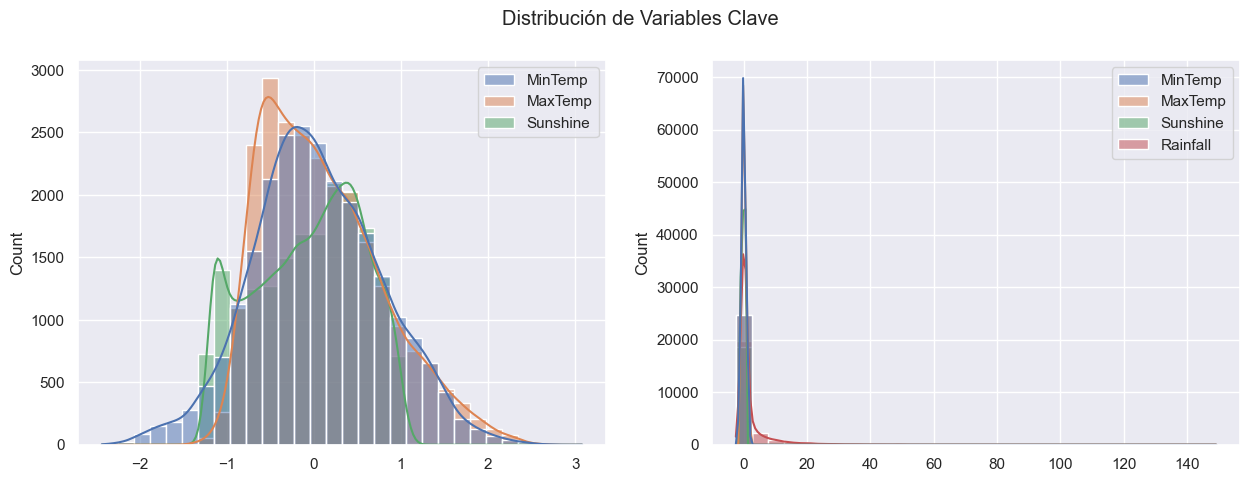

In [294]:
#plt.figure(figsize=(20, 8))

fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.histplot(data=df_numerico_escalado[['MinTemp','MaxTemp','Sunshine']], bins=30, kde=True, ax=ax[0])
sns.histplot(data=df_numerico_escalado[['MinTemp','MaxTemp','Sunshine','Rainfall']], bins=30, kde=True, ax=ax[1])

plt.suptitle('Distribución de Variables Clave')
#plt.xlabel('Valor')
#plt.ylabel('Frecuencia')
plt.show()

Valores atípicos en algunas variables

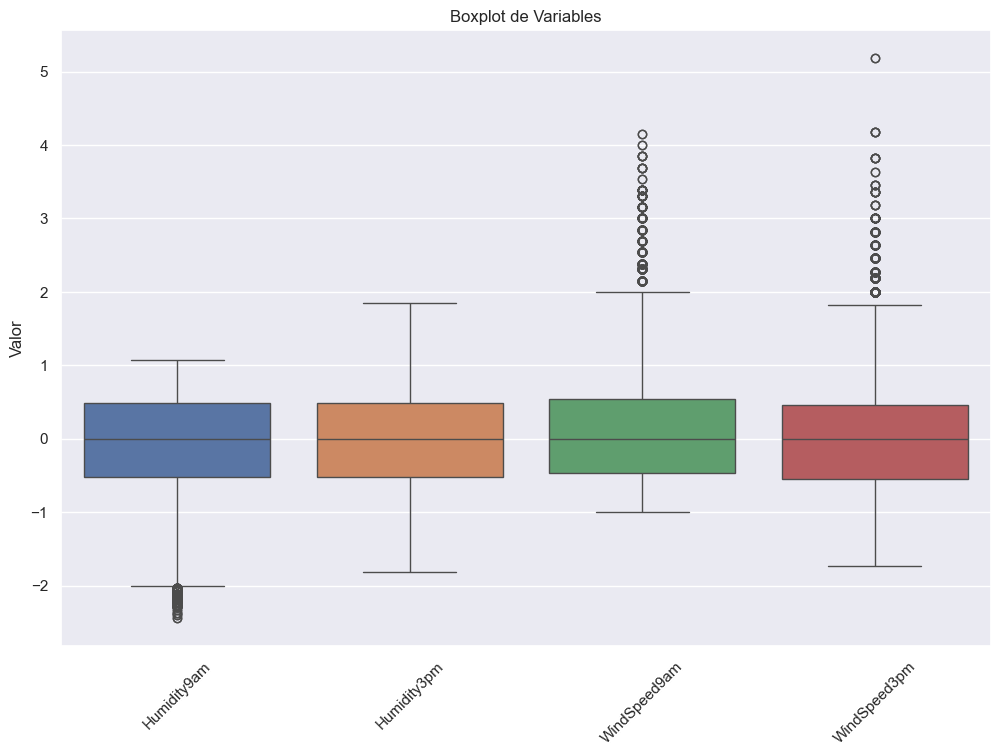

In [295]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_numerico_escalado[['Humidity9am', 'Humidity3pm', 'WindSpeed9am', 'WindSpeed3pm']])
plt.title('Boxplot de Variables')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()


Text(0.5, 1.0, 'Distribución de variables numéricas')

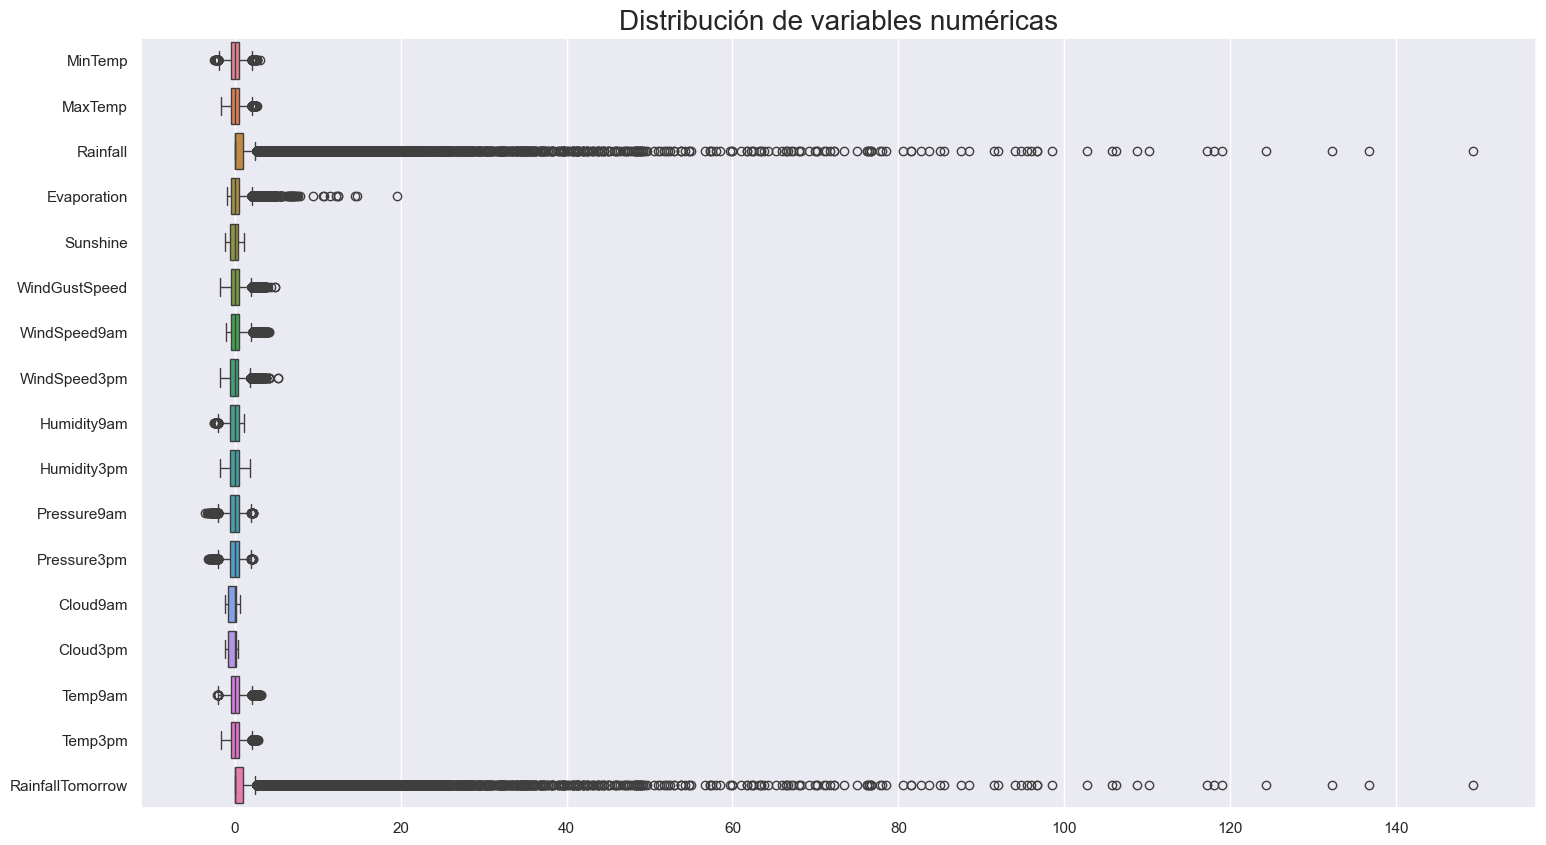

In [296]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=df_numerico_escalado, orient='h')
plt.title("Distribución de variables numéricas", fontsize = 20)

La correlación de nuestras diversas variables numéricas con la variable numérica a predecir es la siguiente:

In [297]:
corr_matrix['RainfallTomorrow'].sort_values(ascending=False)

RainfallTomorrow    1.000000
Humidity3pm         0.489942
Cloud3pm            0.449607
Rainfall            0.385596
Cloud9am            0.343558
Humidity9am         0.302474
WindGustSpeed       0.261914
WindSpeed9am        0.132988
WindSpeed3pm        0.128658
MinTemp             0.015029
Temp9am            -0.108566
Evaporation        -0.174936
Pressure3pm        -0.254146
MaxTemp            -0.258425
Pressure9am        -0.279509
Temp3pm            -0.299044
Sunshine           -0.488825
Name: RainfallTomorrow, dtype: float64

Las dos variables que poseen una mayor correlación con la variable a predecir son la humedad a las 3pm y la luz solar. A continuación vemos estas correlaciones graficadas, logrando ver cómo cuando la humedad a las 3pm es mayor también es más probable que al día siguiente llueva. Del mismo modo, cuando hay más luz solar es más probable que al día siguiente llueva.

Esto tiene sentido ya que es un hecho de que cuando hay días muy soleados y con mucha humedad, al día siguiente suele llover.

Text(0.5, 1.0, 'Relación entre la luz solar y\n la lluvia al día siguiente')

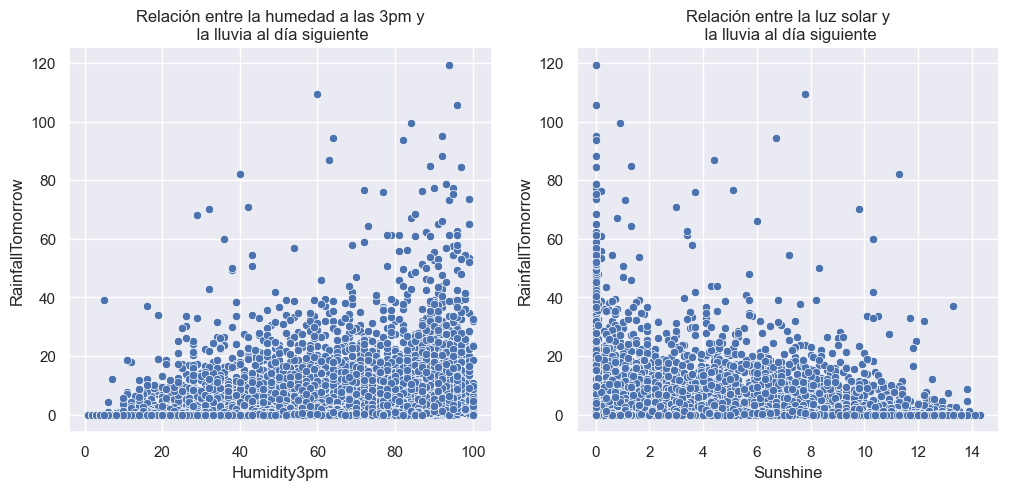

In [298]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.scatterplot(data = df, x='Humidity3pm', y='RainfallTomorrow', ax=ax[0])
ax[0].set_title("Relación entre la humedad a las 3pm y\n la lluvia al día siguiente")
sns.scatterplot(data = df, x='Sunshine', y='RainfallTomorrow', ax=ax[1])
ax[1].set_title("Relación entre la luz solar y\n la lluvia al día siguiente")

Las otras dos variables que les siguen en cuanto a relación con la lluvia al día siguiente son:
Las nubes las 3pm y la temperatura a las 3pm.

Estas relaciones tienen sentido ya que mientras más nublado esté es más probable que llueva al día siguiente. En el caso de la temperatura tenemos que hay una relación no tan lineal pero que al final nos termina indicando que mientras mayor es la temperatura a las 3pm es menos probable que llueva: la tempreatura no debe ser ni muy baja ni muy alta para que las probabilidades de lluvia al día siguiente aumenten.

Text(0.5, 1.0, 'Relación entre la temperatura a las 3pm y\n la lluvia al día siguiente')

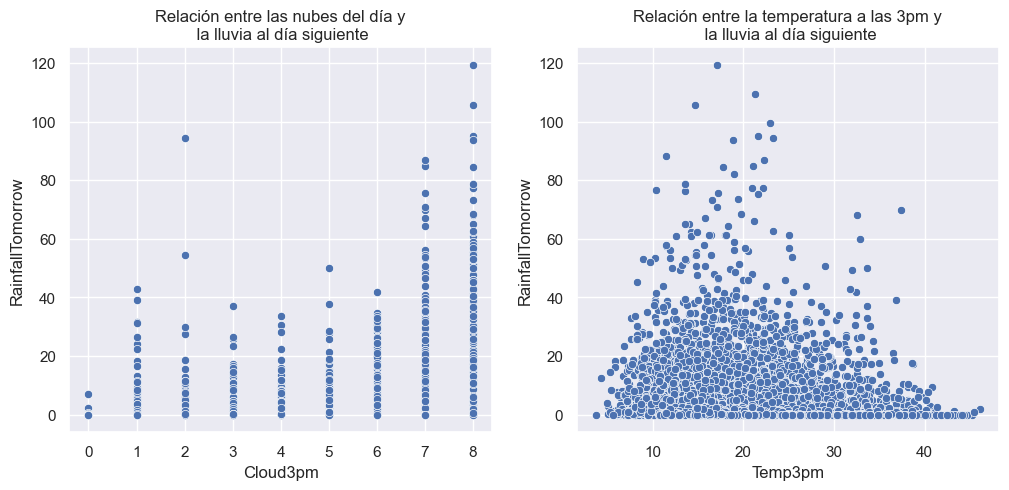

In [299]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.scatterplot(data = df, x='Cloud3pm', y='RainfallTomorrow', ax=ax[0])
ax[0].set_title("Relación entre las nubes del día y\n la lluvia al día siguiente")
sns.scatterplot(data = df, x='Temp3pm', y='RainfallTomorrow', ax=ax[1])
ax[1].set_title("Relación entre la temperatura a las 3pm y\n la lluvia al día siguiente")

Para finalizar con este análisis de correlaciones seguimos con las ultimas dos variables más relacionadas con la variable dependiente: la lluvia del día y la presión a las 9 de la mañana.

En este caso vemos cómo a medida que la lluvia actual aumenta, también lo hace la lluvia de mañana. Por el contrario en el caso de la presión a las 9am vemos que es más probable que llueva mañana cuando la presión del día se encuentra con valores ni muy bajos ni muy altos.

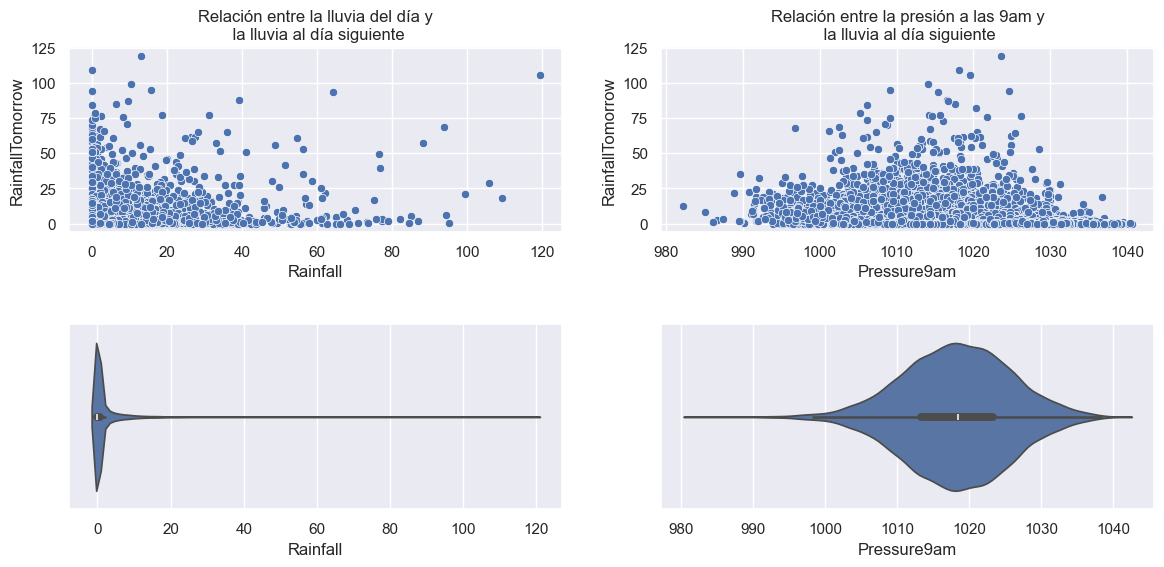

In [300]:
fig, ax = plt.subplots(2,2, figsize=(14,6))

sns.scatterplot(data = df, x='Rainfall', y='RainfallTomorrow', ax=ax[0,0])
ax[0,0].set_title("Relación entre la lluvia del día y\n la lluvia al día siguiente")
sns.violinplot(data = df['Rainfall'], ax=ax[1,0], orient='h')

sns.scatterplot(data = df, x='Pressure9am', y='RainfallTomorrow', ax=ax[0,1])
ax[0,1].set_title("Relación entre la presión a las 9am y\n la lluvia al día siguiente")
sns.violinplot(data = df['Pressure9am'], ax=ax[1,1], orient='h')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


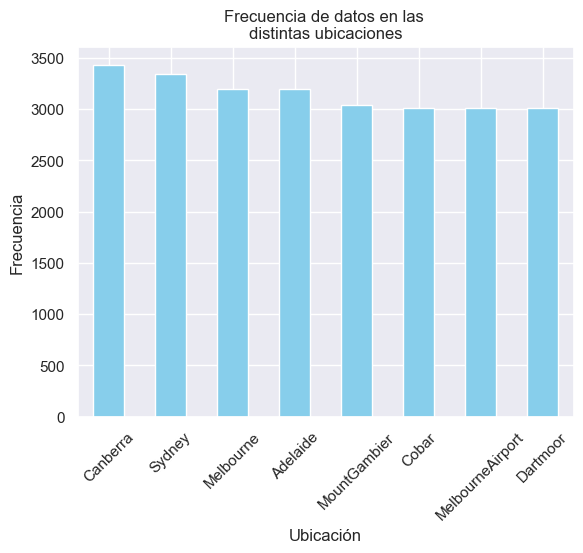

In [301]:
plt.figure()
df['Location'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frecuencia de datos en las \ndistintas ubicaciones')
plt.xlabel('Ubicación')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

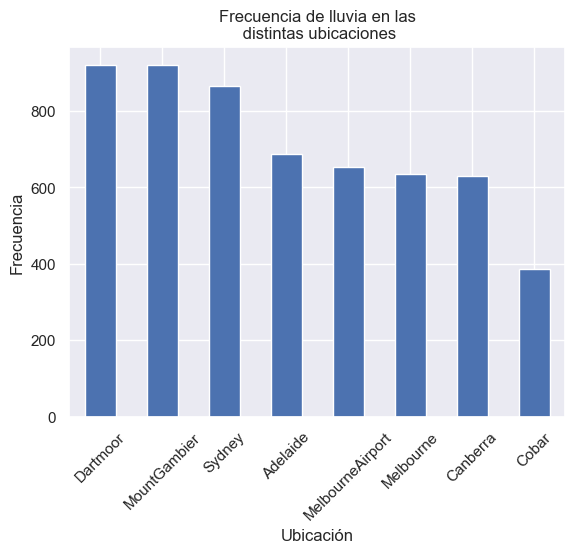

In [302]:
plt.figure()
df[df['RainTomorrow']=='Yes']['Location'].value_counts().plot(kind='bar')
plt.title('Frecuencia de lluvia en las\n distintas ubicaciones')
plt.xlabel('Ubicación')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

In [303]:
df['anio'] = df['Date'].dt.year

C:\Users\Lucas\AppData\Local\Temp\ipykernel_11936\2383780360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anio'] = df['Date'].dt.year


In [304]:
conteo = df[df['RainToday'] == 'Yes'].groupby(['anio','Season'])['RainToday'].value_counts()
conteo

anio  Season     RainToday
2007  Primavera  Yes            7
      Verano     Yes           12
2008  Invierno   Yes           81
      Otoño      Yes           32
      Primavera  Yes           71
      Verano     Yes           62
2009  Invierno   Yes          234
      Otoño      Yes          150
      Primavera  Yes          167
      Verano     Yes           80
2010  Invierno   Yes          231
      Otoño      Yes          158
      Primavera  Yes          201
      Verano     Yes          146
2011  Invierno   Yes          199
      Otoño      Yes          115
      Primavera  Yes          192
      Verano     Yes          140
2012  Invierno   Yes          244
      Otoño      Yes          174
      Primavera  Yes          134
      Verano     Yes           93
2013  Invierno   Yes          240
      Otoño      Yes          145
      Primavera  Yes          170
      Verano     Yes           61
2014  Invierno   Yes          193
      Otoño      Yes          175
      Primavera  Yes 

In [305]:
dfConteo = pd.DataFrame(conteo)
dfConteo

count
anio Season    RainToday       
2007 Primavera Yes            7
     Verano    Yes           12
2008 Invierno  Yes           81
     Otoño     Yes           32
     Primavera Yes           71
     Verano    Yes           62
2009 Invierno  Yes          234
     Otoño     Yes          150
     Primavera Yes          167
     Verano    Yes           80
2010 Invierno  Yes          231
     Otoño     Yes          158
     Primavera Yes          201
     Verano    Yes          146
2011 Invierno  Yes          199
     Otoño     Yes          115
     Primavera Yes          192
     Verano    Yes          140
2012 Invierno  Yes          244
     Otoño     Yes          174
     Primavera Yes          134
     Verano    Yes           93
2013 Invierno  Yes          240
     Otoño     Yes          145
     Primavera Yes          170
     Verano    Yes           61
2014 Invierno  Yes          193
     Otoño     Yes          175
     Primavera Yes          114
     Verano    Yes          108
2015 Invierno  Yes          190
     Otoño     Yes          153
     Primavera Yes          109
     Verano    Yes           94
2016 Invierno  Yes          272
     Otoño     Yes          144
     Primavera Yes          218
     Verano    Yes          123
2017 Invierno  Yes           26
     Otoño     Yes          171
     Verano    Yes           72

<Axes: xlabel='Date', ylabel='Rainfall'>

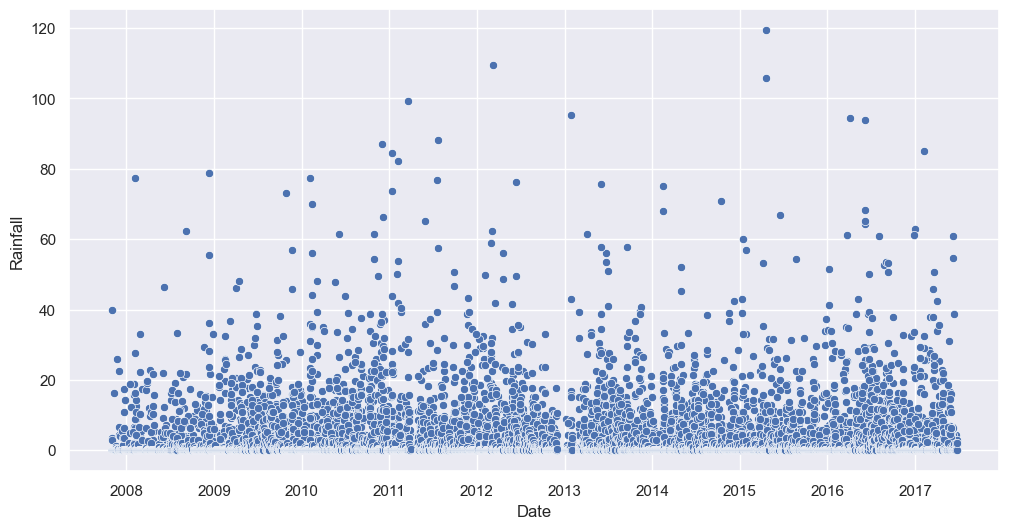

In [306]:
#fig, ax = plt.subplots(2,1,figsize = (18,10))
plt.figure(figsize=(12,6))
sns.scatterplot(data = df, x='Date', y='Rainfall')
#df[df['Rainfall']=='Yes']['Season'].value_counts().plot(kind='bar', ax=ax[1])
#sns.countplot(x='Season', data=df, y=df[df['Rainfall'] == 'Yes'], ax=ax[1])

# Split Train Validation Test #CORREGIR SEGUN INDICACIONES PROFESOR

In [307]:
# Codificación de variables categóricas
columns = ['Location', 'WindGustDir', 'RainToday', 'WindDir9am','WindDir3pm']
df_encoded = pd.get_dummies(df, columns=columns, drop_first=True)
df_encoded.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainTomorrow', 'RainfallTomorrow', 'Season',
       'anio', 'Location_Canberra', 'Location_Cobar', 'Location_Dartmoor',
       'Location_Melbourne', 'Location_MelbourneAirport',
       'Location_MountGambier', 'Location_Sydney', 'WindGustDir_ENE',
       'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE',
       'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE',
       'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W',
       'WindGustDir_WNW', 'WindGustDir_WSW', 'RainToday_Yes', 'WindDir9am_ENE',
       'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE',
       'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE',
       'WindDir9am_SSE', 'Win

Para realizar la división de los datos, primero ordenaremos el dataframe por fecha y tomaremos el 80% del mismo para entrenamiento y el 20% restante para testeo.

In [308]:
#Ordenamos por fecha
df_encoded.sort_values(by='Date', ascending=True, inplace=True)

In [309]:
cantFilas = df_encoded.shape[0]
cantEntrenamiento = cantFilas*0.8
cantTest = cantFilas*0.2
cantEntrenamiento, cantTest

(20180.0, 5045.0)

Tenemos así que las primeras 20180 filas las usaremos como entrenamiento, y las últimas 5045 las usaremos como testeo.

In [310]:
entrenamiento = df_encoded.head(int(cantEntrenamiento))
testeo = df_encoded.tail(int(cantTest))

Nuestros conjuntos quedan con las siguientes dimensiones.

In [311]:
entrenamiento.shape, testeo.shape

((20180, 74), (5045, 74))

Ahora, queda separar las variables dependientes de las independientes. Para ello separamos de los conjuntos las variables que deseamos predecir.

In [312]:
#Para entrenamiento
X_train = entrenamiento.drop(['RainfallTomorrow', 'RainTomorrow'], axis=1)
y1_train = entrenamiento['RainTomorrow']
y2_train = entrenamiento['RainfallTomorrow']

#Para test
X_test = testeo.drop(['RainfallTomorrow', 'RainTomorrow'], axis=1)
y1_test = testeo['RainTomorrow']
y2_test = testeo['RainfallTomorrow']

Por último, eliminamos las variables no numéricas que dejamos. La excepción será Season ya que la usaremos posteriormente para inputar los nulos.

In [313]:
X_train.drop('Date', axis = 1, inplace = True)
X_test.drop('Date', axis = 1, inplace = True)

# Nulos

In [314]:
X_train.iloc[:,:20].isnull().sum()

MinTemp               354
MaxTemp               341
Rainfall              739
Evaporation          1977
Sunshine             3942
WindGustSpeed        1518
WindSpeed9am          348
WindSpeed3pm          336
Humidity9am           601
Humidity3pm           556
Pressure9am           615
Pressure3pm           613
Cloud9am             7165
Cloud3pm             7454
Temp9am               369
Temp3pm               363
Season                  0
anio                    0
Location_Canberra       0
Location_Cobar          0
dtype: int64

In [315]:
X_test.iloc[:,:20].isnull().sum()

MinTemp               215
MaxTemp               217
Rainfall              243
Evaporation          2330
Sunshine             2755
WindGustSpeed          73
WindSpeed9am            7
WindSpeed3pm            3
Humidity9am           337
Humidity3pm           330
Pressure9am           216
Pressure3pm           213
Cloud9am             2198
Cloud3pm             2096
Temp9am               215
Temp3pm               212
Season                  0
anio                    0
Location_Canberra       0
Location_Cobar          0
dtype: int64

## Nulos numéricos

### Conjunto Entrenamiento

Valores nulos de Mediana, son aquellos valores que decidimos completar con esta medida, por ejemplo las temperaturas minimas y maximas, los valores de Rainfall y Evaporation, la presion a las 3 y 9, nubosidad y temperatura a 3 y 9

In [316]:
"""
Esta funcion la creamos para poder setear las medianas por locación y estación.
Principalmente creímos que esto es lo apropiado debido a que aspectos como la temperatura,
lluvia, presión, etc., son sensibles tanto a la región como a la estación en la que se miden.
Nos pareció apropiado distinguir las medianas de según cada región y estación del año.
"""

def nulos_mediana(data, col):
    mediana = data.groupby(['Season'])[col].transform('median')
    data.loc[data[col].isnull(), col] = mediana

In [317]:
# Min temp
nulos_mediana(X_train,'MinTemp')
nulos_mediana(X_test,'MinTemp')

# Max temp
nulos_mediana(X_train,'MaxTemp')
nulos_mediana(X_test,'MaxTemp')

# Rainfall
nulos_mediana(X_train,'Rainfall')
nulos_mediana(X_test,'Rainfall')

# Evaporation
nulos_mediana(X_train, 'Evaporation')
nulos_mediana(X_test, 'Evaporation')

# Pressure9am
nulos_mediana(X_train,'Pressure9am')
nulos_mediana(X_test,'Pressure9am')

# Pressure3pm
nulos_mediana(X_train,'Pressure3pm')
nulos_mediana(X_test,'Pressure3pm')

# Temp9am , 3pm
nulos_mediana(X_train,'Temp9am')
nulos_mediana(X_test,'Temp9am')
              
nulos_mediana(X_train,'Temp3pm')
nulos_mediana(X_test,'Temp3pm')

# WindGustSpeed
nulos_mediana(X_train,'WindGustSpeed')
nulos_mediana(X_test,'WindGustSpeed')

# WindSpeed
nulos_mediana(X_train,'WindSpeed9am')
nulos_mediana(X_test,'WindSpeed9am')

nulos_mediana(X_train,'WindSpeed3pm')
nulos_mediana(X_test,'WindSpeed3pm')

# Sunshine
nulos_mediana(X_train,'Sunshine')
nulos_mediana(X_test,'Sunshine')

# Humidity 9am
nulos_mediana(X_train,'Humidity9am')
nulos_mediana(X_test,'Humidity9am')

nulos_mediana(X_train,'Humidity3pm')
nulos_mediana(X_test,'Humidity3pm')

# Cloud
nulos_mediana(X_train, 'Cloud9am')
nulos_mediana(X_test, 'Cloud9am')

nulos_mediana(X_train,'Cloud3pm')
nulos_mediana(X_test,'Cloud3pm')

En el caso de las variables dependientes pareciera ser que poseen la misma cantidad de nulos... Verifiquemos que se trata de los mismos registros

In [318]:
y1_train.isnull().sum(), y2_train.isnull().sum()

(739, 739)

In [319]:
import numpy as np

In [320]:
#Creamos arrays con los indices de cada df que contienen valore nulos
y1IndicesNulos = y1_train[y1_train.isnull() == True].index
y2IndicesNulos = y2_train[y2_train.isnull() == True].index

In [321]:
#Comprobamos que los indces sean iguales
np.unique(y1IndicesNulos == y2IndicesNulos)

array([ True])

Como podemos ver, se trata en ambos casos de los mismos registros. Podríamos buscar imputar estos valores faltantes, pero dado que estos datos representan apenas un 3,6% de nuestros datos, preferimos eliminar estos valores.

In [322]:
print("Proporcion de nulos de y1_train e y2_train con respeccto a la totalidad de los datos: ", y1IndicesNulos.shape[0]/y1_train.shape[0])

Proporcion de nulos de y1_train e y2_train con respeccto a la totalidad de los datos:  0.03662041625371655


Para eliminar estos datos, lo haremos teniendo en cuenta que también debemos eliminar los mismos índices para nuestro X_train.

In [323]:
#Eliminamos esos indices del conjunto de entrenamiento
X_train = X_train[X_train.index.isin(y1IndicesNulos)==False]
X_train.shape

(19441, 71)

In [324]:
y1_train = y1_train.dropna()
y2_train = y2_train.dropna()
y1_train.shape, y2_train.shape

((19441,), (19441,))

### Conjunto Testeo

El conjunto de X_test no posee valores nulos.

In [325]:
X_test.iloc[:,:20].isnull().any()

MinTemp              False
MaxTemp              False
Rainfall             False
Evaporation          False
Sunshine             False
WindGustSpeed        False
WindSpeed9am         False
WindSpeed3pm         False
Humidity9am          False
Humidity3pm          False
Pressure9am          False
Pressure3pm          False
Cloud9am             False
Cloud3pm             False
Temp9am              False
Temp3pm              False
Season               False
anio                 False
Location_Canberra    False
Location_Cobar       False
dtype: bool

Sin embargo, en el caso de las variables dependientes si que los hay. Concretamente 242 registros nulos en cada variable. Comprobemos si son los mismos registros.

In [326]:
y1_test.isnull().sum(), y2_test.isnull().sum()

(242, 242)

In [327]:
listaNulosy1Test = y1_test[y1_test.isnull()].index
listaNulosy2Test = y2_test[y2_test.isnull()].index

In [328]:
np.unique(listaNulosy1Test == listaNulosy2Test)

array([ True])

Comprobamos que se trata de los mismos registros. Verifiquemos el la proporción con respecto al total de estos registros:

In [329]:
len(listaNulosy1Test)/y1_test.shape[0]

0.047968285431119924

Como podemos ver, los valores nulos de estas variables representan a penas un 4% del total. Por lo tanto, removeremos estos registros tanto de las y como del conjunto de las X.

In [330]:
X_test = X_test[X_test.index.isin(listaNulosy1Test)==False]

In [331]:
y1_test = y1_test.dropna()
y2_test = y2_test.dropna()
y1_test.shape, y2_test.shape

((4803,), (4803,))

## Eliminamos Season

In [332]:
X_train = pd.get_dummies(X_train, columns=['Season'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Season'], drop_first=True)

Comprobamos que no hay mas nulos.

In [333]:
null_counts = X_test.isna().sum()
columns_with_nulls = null_counts[null_counts > 0]
print(columns_with_nulls)

Series([], dtype: int64)


In [334]:
null_counts = X_train.isna().sum()
columns_with_nulls = null_counts[null_counts > 0]
print(columns_with_nulls)


Series([], dtype: int64)


# Balanceado

 Muestra la frecuencia de cada combinación de clases entre las dos variables objetivo.

In [335]:
# Discretizar usando cut()
bins = [-0.1,10, 20, 30, 40, 50, 60, 70, 80, 90, 100,500]  # Define los límites de los intervalos

discretizado = pd.DataFrame()

discretizado['RFTdiscretized'] = pd.cut(y2_train, bins=bins)
discretizado['RFTdiscretized']

45573    (-0.1, 10.0]
45574    (-0.1, 10.0]
45575    (30.0, 40.0]
45576    (-0.1, 10.0]
45577    (-0.1, 10.0]
             ...     
32878    (-0.1, 10.0]
83348    (-0.1, 10.0]
8423     (-0.1, 10.0]
83349    (-0.1, 10.0]
98850    (-0.1, 10.0]
Name: RFTdiscretized, Length: 19441, dtype: category
Categories (11, interval[float64, right]): [(-0.1, 10.0] < (10.0, 20.0] < (20.0, 30.0] < (30.0, 40.0] ... (70.0, 80.0] < (80.0, 90.0] < (90.0, 100.0] < (100.0, 500.0]]

In [336]:
merged_df = pd.merge(y1_train, discretizado, left_index=True, right_index=True, suffixes=('_left', '_right'), how='inner')

In [337]:
class_counts = merged_df.groupby(['RFTdiscretized', 'RainTomorrow']).size().unstack(fill_value=0)
class_counts

C:\Users\Lucas\AppData\Local\Temp\ipykernel_11936\68741034.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  class_counts = merged_df.groupby(['RFTdiscretized', 'RainTomorrow']).size().unstack(fill_value=0)


RainTomorrow,No,Yes
RFTdiscretized,,
"(-0.1, 10.0]",14866,3535
"(10.0, 20.0]",0,674
"(20.0, 30.0]",0,208
"(30.0, 40.0]",0,84
"(40.0, 50.0]",0,26
"(50.0, 60.0]",0,19
"(60.0, 70.0]",0,10
"(70.0, 80.0]",0,10
"(80.0, 90.0]",0,4


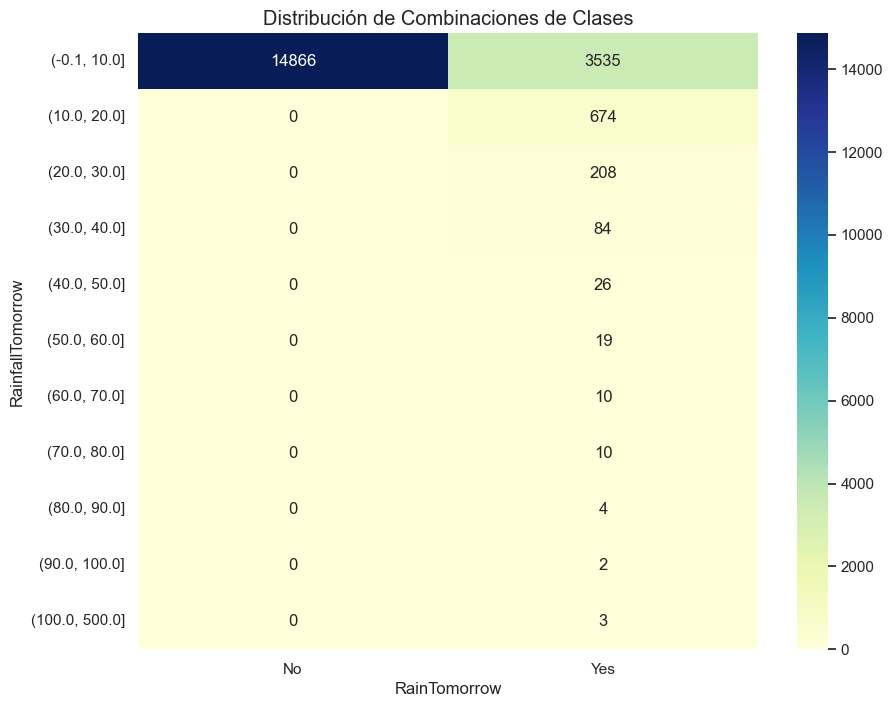

In [338]:
plt.figure(figsize=(10, 8))
sns.heatmap(class_counts, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Distribución de Combinaciones de Clases', fontsize = "large")
plt.xlabel('RainTomorrow')
plt.ylabel('RainfallTomorrow')
plt.show()

Vemos que hay un gran desbalanceo en las predicciones con respecto a la variable RainTomorrow, la cual posee una cantidad de valores "No" mucho mayor a los valores "Yes".
En el caso de la variable RainfallTomorrow, vemos que la gran mayoría de los datos se concentra solamente en los primeros diez litros de agua caída.

En el gráfico vemos que para la variable "No" la cantidad de agua caída se concentra en el primer intervalo, lo cual es entendible ya que si el pronóstico de lluvia del día siguiente es que no va a llover, la cantidad de agua caída será igual a 0.

Calcular la proporción de cada combinación de clases

In [339]:
total_samples = len(df)
class_proportions = class_counts.div(total_samples)
class_proportions

RainTomorrow,No,Yes
RFTdiscretized,,
"(-0.1, 10.0]",0.589336,0.140139
"(10.0, 20.0]",0.000000,0.026720
"(20.0, 30.0]",0.000000,0.008246
"(30.0, 40.0]",0.000000,0.003330
"(40.0, 50.0]",0.000000,0.001031
"(50.0, 60.0]",0.000000,0.000753
"(60.0, 70.0]",0.000000,0.000396
"(70.0, 80.0]",0.000000,0.000396
"(80.0, 90.0]",0.000000,0.000159


# Estadarizacion de los datos

In [340]:
from sklearn.preprocessing import RobustScaler

¿Por qué estandarizar?
La estandarización es un proceso importante en el preprocesamiento de datos.
 La estandarización generalmente implica transformar las características para que tengan una media cercana a cero y una desviación estándar de uno. 
 Esto ayuda a que las características estén en la misma escala, lo que puede mejorar la convergencia del modelo y la interpretación de los pesos de las características.

In [341]:
#Creamos df para cada par de train y test respectivamente
df_train_regresion = pd.concat([X_train,y1_train], axis = 1)
df_test_regresion = pd.concat([X_test,y1_test], axis = 1)

In [342]:
#Cambiamos los valores de RainTomorrow para que estos sean de 1's y 0's.
df_train_regresion['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df_test_regresion['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

In [343]:
df_x_train = df_train_regresion.iloc[:,:-1] #Seleccionamos todas las columnas menos la ultima
df_y_train = df_train_regresion.iloc[:,-1] #Seleccionamos solo la ultima columna

df_x_test = df_test_regresion.iloc[:,:-1] #Todas menos la ultima para test
df_y_test = df_test_regresion.iloc[:,-1] #Solo la ultima para test

In [347]:
df_y_test.isnull().sum()

0

In [348]:
df_y_test = df_y_test.fillna(method='ffill') #ffill rellena nulos con el valor del registro anterior
df_y_train = df_y_train.fillna(method='ffill')

C:\Users\Lucas\AppData\Local\Temp\ipykernel_11936\1361205829.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_y_test = df_y_test.fillna(method='ffill') #ffill rellena nulos con el valor del registro anterior
C:\Users\Lucas\AppData\Local\Temp\ipykernel_11936\1361205829.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_y_train = df_y_train.fillna(method='ffill')


In [387]:
scaler = RobustScaler()

x_train_scaled = scaler.fit_transform(df_x_train) #X train y X test se escalan por separados para no ocntaminar el entrenamiento

In [388]:
x_test_scaled = scaler.fit_transform(df_x_test)

Es crucial aplicar la misma transformación (media y desviación estándar) que se aprendió del conjunto de entrenamiento (x_train) al conjunto de prueba (x_test). Esto asegura que las características en ambos conjuntos estén en la misma escala relativa. Si aplicas una transformación diferente a x_test, introducirías filtraciones de información del conjunto de prueba al conjunto de entrenamiento, lo cual puede llevar a una evaluación sesgada del modelo.

# Linear Regression

In [389]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [390]:
regresion = LinearRegression()

In [391]:
regresion.fit(x_train_scaled, df_y_train)

LinearRegression()

## Métricas adecuadas

In [392]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [393]:
from math import sqrt
def errores(y_test, y_pred):
    print('R2:   %.2f' % r2_score(y_test, y_pred))
    print('MSE:  %.2f' % mean_squared_error(y_test, y_pred))
    print('RMSE: %.2f' % sqrt(mean_squared_error(y_test, y_pred)))
    print('MAE:  %.2f' % mean_absolute_error(y_test, y_pred))

In [394]:
y_pred_regresion = regresion.predict(x_test_scaled)

errores(df_y_test, y_pred_regresion)

R2:   0.35
MSE:  0.12
RMSE: 0.34
MAE:  0.26


# Metodo gradiente descendiente

In [395]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

SGDRegressor 

Modelo lineal ajustado minimizando una pérdida empírica regularizada con SGD.

SGD significa <b>Descenso de Gradiente Estocástico:</b> el gradiente de la pérdida se estima en cada muestra y el modelo se actualiza a lo largo del camino con una programación de fuerza decreciente (también conocida como tasa de aprendizaje).

El regularizador es una penalización añadida a la función de pérdida que contrae los parámetros del modelo hacia el vector cero utilizando ya sea la norma euclidiana al cuadrado L2 o la norma absoluta L1 o una combinación de ambas (Red Elástica). Si la actualización del parámetro cruza el valor 0.0 debido al regularizador, la actualización se trunca a 0.0 para permitir el aprendizaje de modelos dispersos y lograr la selección de características en línea.

In [396]:
sgd_regressor = SGDRegressor() # Modelo de regresion con gradiente descendiente

In [397]:
sgd_regressor.fit(x_train_scaled, df_y_train)

SGDRegressor()

Predict 

In [398]:
y_train_pred_sgd = sgd_regressor.predict(x_train_scaled)
y_test_pred_sgd = sgd_regressor.predict(x_test_scaled)


Evaluar el modelo

In [399]:
train_mse_sgd = mean_squared_error(df_y_train, y_train_pred_sgd) #error cuadratico medio entrenamiento
test_mse_sgd = mean_squared_error(df_y_test, y_test_pred_sgd) #error cuadratico medio test

train_r2_sgd = r2_score(df_y_train, y_train_pred_sgd) #r2 entrenamiento
test_r2_sgd = r2_score(df_y_test, y_test_pred_sgd) #r2 train

# Imprimir las métricas obtenidas
print("Métricas del modelo con Gradiente Descendiente:")
print("MSE (entrenamiento):", train_mse_sgd)
print("MSE (prueba):", test_mse_sgd)
print("R² Score (entrenamiento):", train_r2_sgd)
print("R² Score (prueba):", test_r2_sgd)

Métricas del modelo con Gradiente Descendiente:
MSE (entrenamiento): 0.11661208812495646
MSE (prueba): 0.11799068454673708
R² Score (entrenamiento): 0.35196935212976654
R² Score (prueba): 0.3409562895874878


### ¿Hay algun cambio?
Vemos que el error cuadrático medio (MSE) es ligeramente mayor en la regresión con gradiente estocastico, mientras que el R² es ligeramente menor. Sin embargo, estos valores son prácticamente identicos, por loq ue podemos decir que no hay cambios significativos en ambos métodos.

# Lasso

In [400]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [401]:
lasso_regressor = Lasso(alpha=0.01) # Modelo de regresion con regularizacion lasso

In [402]:
lasso_regressor.fit(x_train_scaled, df_y_train) # Entrenamos

Lasso(alpha=0.01)

Predict

In [403]:
y_train_pred_lasso = lasso_regressor.predict(x_train_scaled)
y_test_pred_lasso = lasso_regressor.predict(x_test_scaled)

Evaluamos

In [404]:
train_mse_lasso = mean_squared_error(df_y_train, y_train_pred_lasso)
test_mse_lasso = mean_squared_error(df_y_test, y_test_pred_lasso)

In [405]:
train_r2_lasso = r2_score(df_y_train, y_train_pred_lasso) #r2 entrenamiento
test_r2_lasso = r2_score(df_y_test, y_test_pred_lasso) #r2 train

In [406]:

print("Métricas del modelo Lasso:")
print("MSE (entrenamiento):", train_mse_lasso)
print("R² (entrenamiento): ",train_r2_lasso)
print("MSE (prueba):", test_mse_lasso)
print("R² (entrenamiento): ",test_r2_lasso)



Métricas del modelo Lasso:
MSE (entrenamiento): 0.12142446226748503
R² (entrenamiento):  0.3252262761457826
MSE (prueba): 0.12049705186005848
R² (entrenamiento):  0.3269568317474607


# Ridge

In [407]:
ridge_regressor = Ridge(alpha=0.01) # Modelo de regresion con regularizacion Ridge

In [408]:
ridge_regressor.fit(x_train_scaled, df_y_train) # Entrenamos

Ridge(alpha=0.01)

Predicts

In [409]:
y_train_pred_ridge = ridge_regressor.predict(x_train_scaled)
y_test_pred_ridge = ridge_regressor.predict(x_test_scaled)

MSE

In [410]:
train_mse_ridge = mean_squared_error(df_y_train, y_train_pred_ridge)
test_mse_ridge = mean_squared_error(df_y_test, y_test_pred_ridge)

In [411]:
train_r2_ridge = r2_score(df_y_train, y_train_pred_ridge)
test_r2_ridge = r2_score(df_y_test, y_test_pred_ridge)

In [412]:
print("\nMétricas del modelo Ridge:")
print("MSE (entrenamiento):", train_mse_ridge)
print("MSE (prueba):", test_mse_ridge)
print("R² (entrenamiento): ", train_r2_ridge)
print("R² (prueba): ", test_r2_ridge)


Métricas del modelo Ridge:
MSE (entrenamiento): 0.1154732224757866
MSE (prueba): 0.11637616193741003
R² (entrenamiento):  0.35829819724638834
R² (prueba):  0.349974297874187


# ElasticNET

In [413]:
elasticnet_regressor = ElasticNet() # Modelo con Elastic Net

In [414]:
elasticnet_regressor.fit(x_train_scaled, df_y_train) # Entrenamos


ElasticNet()

Predicts

In [415]:
y_train_pred_elasticnet = elasticnet_regressor.predict(x_train_scaled)
y_test_pred_elasticnet = elasticnet_regressor.predict(x_test_scaled)

MSE

In [416]:
train_mse_elasticnet = mean_squared_error(df_y_train, y_train_pred_elasticnet)
test_mse_elasticnet = mean_squared_error(df_y_test, y_test_pred_elasticnet)

In [417]:
train_r2_elasticnet = r2_score(df_y_train, y_train_pred_elasticnet)
test_r2_elasticnet = r2_score(df_y_test, y_test_pred_elasticnet)

In [418]:
print("\nMétricas del modelo ElasticNet:")
print("MSE (entrenamiento):", train_mse_elasticnet)
print("MSE (prueba):", test_mse_elasticnet)
print("R² (entrenamiento): ", train_r2_elasticnet)
print("R² (prueba): ", test_r2_elasticnet)


Métricas del modelo ElasticNet:
MSE (entrenamiento): 0.1746023636509826
MSE (prueba): 0.1734151809808776
R² (entrenamiento):  0.029708800727620943
R² (prueba):  0.03137959785101163


# ¿Fue un buen fitting?

Si tenemos en cuenta solo la métrica R² de cada método utilizado, nos quedaría lo siguiente:

In [419]:
train_r2_sgd

0.35196935212976654

In [420]:
metricas = pd.DataFrame()
metricas['Regresion'] = [r2_score(df_y_test, y_pred_regresion)]
metricas['Gradiente'] = [train_r2_sgd]
metricas['Lasso'] = [train_r2_lasso]
metricas['Ridge'] = [train_r2_ridge]
metricas['Elasticnet'] = [train_mse_elasticnet]
metricas

,Regresion,Gradiente,Lasso,Ridge,Elasticnet
0,0.349974,0.351969,0.325226,0.358298,0.174602


In [421]:
metricas_transpuesta = metricas.transpose().rename(columns = {0:'R²'})

<Axes: xlabel='None', ylabel='R²'>

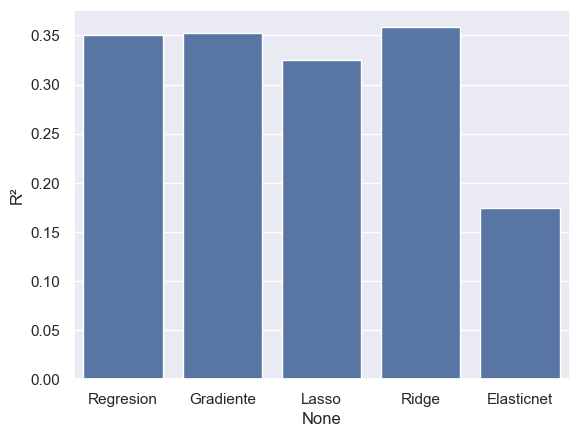

In [422]:
sns.barplot(data = metricas_transpuesta, x=metricas_transpuesta.index, y=metricas_transpuesta['R²'])

Observamos que si bien los resultados tienden a ser similares (excepto Elasticnet), nuestra regresion común es la que explica más a la variable dependiente.

## Análisis de Residuos

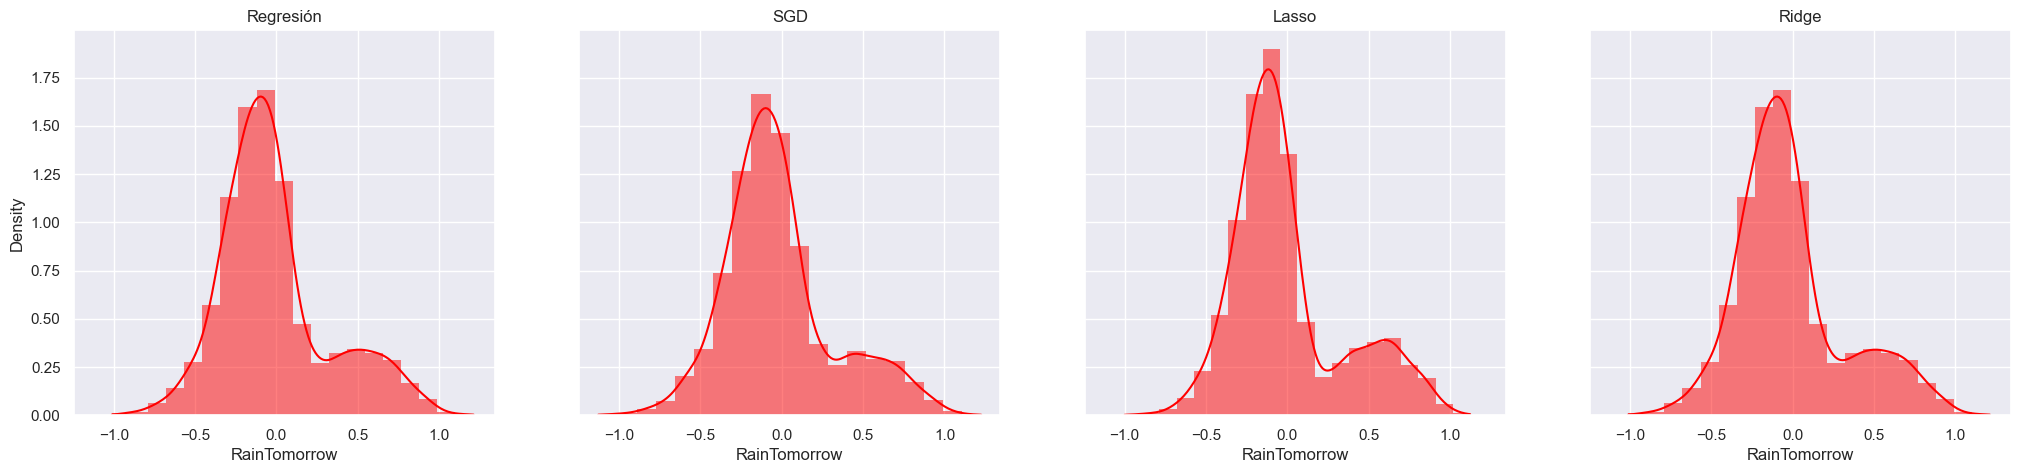

In [423]:
fig, ax = plt.subplots(1,4,figsize=(25,5), sharex=True, sharey=True)
  

sns.histplot((df_y_test - y_pred_regresion), color="red", kde=True, stat="density", linewidth=0,bins=20, ax=ax[0])
ax[0].set_title('Regresión')

sns.histplot((df_y_test - y_test_pred_sgd), color="red", kde=True, stat="density", linewidth=0,bins=20, ax=ax[1])
ax[1].set_title('SGD')

sns.histplot((df_y_test - y_test_pred_lasso), color="red", kde=True, stat="density", linewidth=0,bins=20, ax=ax[2])
ax[2].set_title('Lasso')

sns.histplot((df_y_test - y_test_pred_ridge), color="red", kde=True, stat="density", linewidth=0,bins=20, ax=ax[3])
ax[3].set_title('Ridge')

plt.show()

En este caso todos los residuos son mayores a -2 y menores a 2, por lo que podemos decir que estos cuatro primeros modelos se ajustan adecuadamente a los datos y sus errores de predicción son relativamente pequeños.

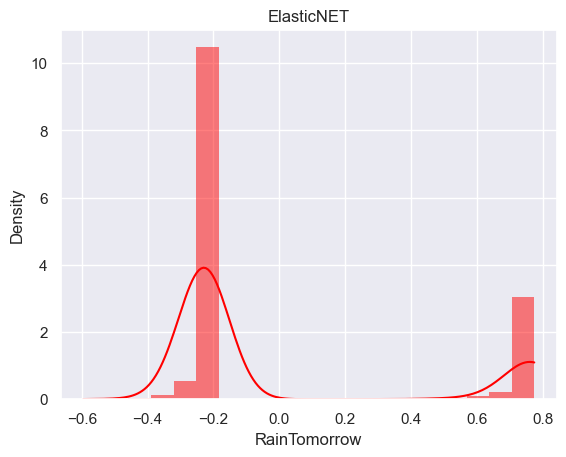

In [424]:
sns.histplot((df_y_test - y_test_pred_elasticnet), color="red", kde=True, stat="density", linewidth=0,bins=20)
plt.title('ElasticNET')
plt.show()

En el caso de ElasticNET no podemos decir lo mismo...

## ¿Por que se obtienen las metricas para ambos conjuntos?
La razón es principalmente el overfitting: puede pasar que nuestro modelo se desempeñe de manera excelente con los datos de entrenamiento pero no se ajuste a los datos reales.